In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import scipy.sparse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, recall_score, confusion_matrix, make_scorer
import pickle

### Random Forest hyperparameters

In [2]:
params = {
    'max_depth':[1,2,5,10,15],
    'n_estimators':[10,30,100],
    'class_weight': ['balanced'],
    'max_features':[None],
    'random_state': [42],
    'n_jobs':[-1],
    'verbose':[1]
}

### Import data

In [3]:
print('Importing data...')
data_path = r'data/clean_df.csv.gz'
df = pd.read_csv(data_path)
print('Done.')

print('Engineering features...')
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

df['CASUALTIES?'] = 0
mask = df['TOTAL PEDESTRIAN CASUALTIES'] != 0
df.loc[mask, 'CASUALTIES?'] = 1
df.loc[df['TOTAL PEDESTRIAN CASUALTIES'] != 1, ['TOTAL PEDESTRIAN CASUALTIES','CASUALTIES?']].sample(5)
print('Done.')

Importing data...
Done.
Engineering features...
Done.


### K-Means analysis

Manhattan K-Means analysis
# Clusters: 2
    f1 score: 0.1541123002492303
# Clusters: 3
    f1 score: 0.1621875839828003
# Clusters: 4
    f1 score: 0.16244468182511826
# Clusters: 5
    f1 score: 0.15882567469000727
# Clusters: 6
    f1 score: 0.1605709471810278
# Clusters: 7
    f1 score: 0.16494845360824742
# Clusters: 8
    f1 score: 0.1634797405083484
# Clusters: 9
    f1 score: 0.15778344877870945
# Clusters: 10
    f1 score: 0.1639133137934097
# Clusters: 11
    f1 score: 0.16563576573755087
# Clusters: 12
    f1 score: 0.1668766552672855
# Clusters: 13
    f1 score: 0.16925662453668533
# Clusters: 14
    f1 score: 0.16725885298676524
# Clusters: 15
    f1 score: 0.1679213359162355
# Clusters: 16
    f1 score: 0.1643656761527116
# Clusters: 17
    f1 score: 0.16369999396608942
# Clusters: 18
    f1 score: 0.16507481174821528
# Clusters: 19
    f1 score: 0.1656102769209911
# Clusters: 20
    f1 score: 0.16798979671516698
Brooklyn K-Means analysis
# Clusters: 2
    f1 score: 0.148

<ipython-input-4-c115e6deaeb4>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    f1 score: 0.09454545454545454
# Clusters: 3
    f1 score: 0.09076814658210007
# Clusters: 4
    f1 score: 0.0894412038211176
# Clusters: 5
    f1 score: 0.0910766561856229
# Clusters: 6
    f1 score: 0.09948652118100129
# Clusters: 7
    f1 score: 0.09795918367346938
# Clusters: 8
    f1 score: 0.09749582637729551
# Clusters: 9
    f1 score: 0.09901234567901235
# Clusters: 10
    f1 score: 0.10998051526304396
# Clusters: 11
    f1 score: 0.10924229808492925
# Clusters: 12
    f1 score: 0.10841836734693877
# Clusters: 13
    f1 score: 0.10866324333278117
# Clusters: 14
    f1 score: 0.10948012232415902
# Clusters: 15
    f1 score: 0.11104179663131628
# Clusters: 16
    f1 score: 0.10952528699968973
# Clusters: 17
    f1 score: 0.10925338714326895
# Clusters: 18
    f1 score: 0.11007596388132435
# Clusters: 19
    f1 score: 0.10970724191063173
# Clusters: 20
    f1 score: 0.1089334548769371
Queens K-Means analysis


<ipython-input-4-c115e6deaeb4>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    f1 score: 0.12733928740492947
# Clusters: 3
    f1 score: 0.12647743136342485
# Clusters: 4
    f1 score: 0.12415392625550245
# Clusters: 5
    f1 score: 0.126448258919373
# Clusters: 6
    f1 score: 0.12820512820512822
# Clusters: 7
    f1 score: 0.12856685438758406
# Clusters: 8
    f1 score: 0.12995651061652597
# Clusters: 9
    f1 score: 0.1283862454397268
# Clusters: 10
    f1 score: 0.1279746658594514
# Clusters: 11
    f1 score: 0.13191261583754307
# Clusters: 12
    f1 score: 0.1294084301737053
# Clusters: 13
    f1 score: 0.12774294670846395
# Clusters: 14
    f1 score: 0.12828107445613318
# Clusters: 15
    f1 score: 0.12991683524387504
# Clusters: 16
    f1 score: 0.13454671848832434
# Clusters: 17
    f1 score: 0.13426235245458307
# Clusters: 18
    f1 score: 0.13775641135309918
# Clusters: 19
    f1 score: 0.1363660370050878
# Clusters: 20
    f1 score: 0.1379275053304904
Bronx K-Means analysis


<ipython-input-4-c115e6deaeb4>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    f1 score: 0.14852952648412512
# Clusters: 3
    f1 score: 0.14443686571174633
# Clusters: 4
    f1 score: 0.14793522059389677
# Clusters: 5
    f1 score: 0.14999849881406313
# Clusters: 6
    f1 score: 0.14613164299054843
# Clusters: 7
    f1 score: 0.14976383164355123
# Clusters: 8
    f1 score: 0.14865702479338844
# Clusters: 9
    f1 score: 0.15371823144499477
# Clusters: 10
    f1 score: 0.1540273891915771
# Clusters: 11
    f1 score: 0.15087099524911682
# Clusters: 12
    f1 score: 0.1496245128172629
# Clusters: 13
    f1 score: 0.15040916021033637
# Clusters: 14
    f1 score: 0.15152680563033613
# Clusters: 15
    f1 score: 0.15440059357665267
# Clusters: 16
    f1 score: 0.15366438475171143
# Clusters: 17
    f1 score: 0.15295201194143615
# Clusters: 18
    f1 score: 0.15332012526362881
# Clusters: 19
    f1 score: 0.15296195408147994
# Clusters: 20
    f1 score: 0.15222444889779557


<ipython-input-4-c115e6deaeb4>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


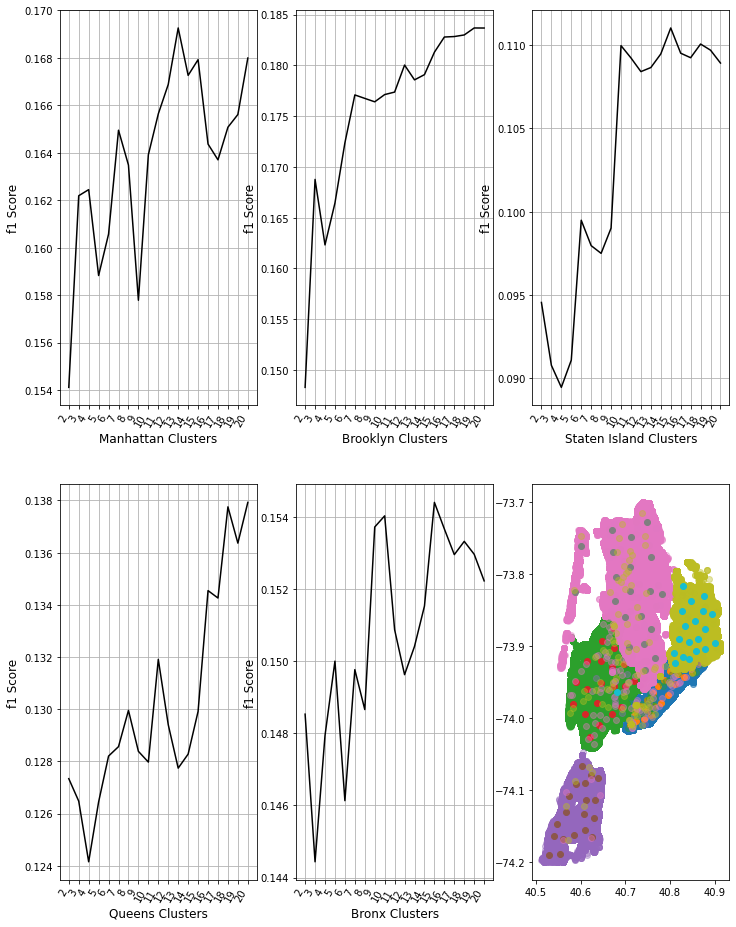

In [4]:
boroughs = ['MANHATTAN','BROOKLYN','STATEN ISLAND','QUEENS','BRONX']
subplots = [231,232,233,234,235]
_ = plt.figure(figsize=(12,16))
max_k = {}
for space, current_borough in zip(subplots, boroughs):
    print(f'{current_borough.title()} K-Means analysis')
    borough = df[df['BOROUGH'] == current_borough]
    f1_list = []
    for i in range(2,21):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(borough[['LATITUDE','LONGITUDE']].values)
        df_clusters = pd.Series(kmeans.labels_)
        cluster_dummies = pd.get_dummies(df_clusters)
        X = scipy.sparse.csr_matrix(cluster_dummies)
        y = borough['CASUALTIES?']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        log_reg = LogisticRegression(class_weight='balanced', max_iter=10_000)
        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        log_f1 = f1_score(y_test, y_pred)
        print(f'# Clusters: {i}\n    f1 score: {log_f1}')
        f1_list.append(log_f1)
    _ = plt.subplot(space)
    _ = plt.plot(range(2,21), f1_list, 'k-')
    _ = plt.grid()
    _ = plt.xlabel(f'{current_borough.title()} Clusters', fontsize=12)
    _ = plt.ylabel('f1 Score', fontsize=12)
    _ = plt.xticks(range(2,21), rotation=60, ha='right')
    max_k[current_borough] = {
                        'K':f1_list.index(max(f1_list))+2,
                        'Score': max(f1_list)
            }
    _ = plt.subplot(236)
    _ = plt.scatter(borough['LATITUDE'], borough['LONGITUDE'], alpha=0.4)
    _ = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])

In [5]:
_ = plt.savefig('K-Means tuning.png')
for i in max_k:
    print(f'{i}\n    {max_k[i]}')

MANHATTAN
    {'K': 13, 'Score': 0.16925662453668533}
BROOKLYN
    {'K': 19, 'Score': 0.18367902162225186}
STATEN ISLAND
    {'K': 15, 'Score': 0.11104179663131628}
QUEENS
    {'K': 20, 'Score': 0.1379275053304904}
BRONX
    {'K': 15, 'Score': 0.15440059357665267}


<Figure size 432x288 with 0 Axes>

### Fit clusters

In [ ]:
print('Fitting K-means clusters...')
k_clusters = []
for i in max_k:
    k_clusters.append(max_k[i]['K'])
for n, borough in zip(k_clusters,boroughs):
    print(f'    Calculating {borough.title()} clusters...')
    
    borough_accidents = df[df['BOROUGH'] == borough]
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(borough_accidents[['LATITUDE','LONGITUDE']].values)
    
    df.loc[df['BOROUGH'] == borough, f'{borough} CLUSTERS'] = kmeans.labels_
print('Done.')

Fitting K-means clusters...
    Calculating Manhattan clusters...
    Calculating Brooklyn clusters...
    Calculating Staten Island clusters...
    Calculating Queens clusters...


### Create feature set

In [ ]:
print('Creating feature set...')
borough_dummies = pd.get_dummies(df['BOROUGH'], sparse=True)
borough_clusters = [borough+' CLUSTERS' for borough in boroughs]
cluster_dummies = pd.get_dummies(df[borough_clusters].fillna(''), prefix='CLUSTER', sparse=True)
pre_X = cluster_dummies.join(borough_dummies)
print('Done.')

### Split data

In [ ]:
print('Splitting data...')
X = scipy.sparse.csr_matrix(pre_X)
y = df['CASUALTIES?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Done.')

### Random Forest grid search

In [ ]:
cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, scoring=make_scorer(recall_score), n_jobs=-1, return_train_score=True)
cv.fit(X_train, y_train)

cv_results = pd.DataFrame(cv.cv_results_)
cv_results[['param_max_depth','param_n_estimators','mean_train_score','mean_test_score','mean_fit_time']].sort_values(by='mean_test_score', ascending=False)

print(f'{cv.best_params_}\n{cv.best_score_}')

### Random Forest best params

In [ ]:
rf_clf = RandomForestClassifier(**cv.best_params_)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print(cv.best_params_)
print(f1_score(y_test, y_pred))

In [ ]:
params_path = r'Predictor tools/rf_params.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(cv.best_params_, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)
    
test == cv.best_params_

In [ ]:
params_path = r'Predictor tools/k_clusters.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(max_k, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)

test == max_k